<a href="https://colab.research.google.com/github/Karen-Nasambu/PCOS-pydataproject/blob/main/PCOSHEALTHPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [17]:
df = pd.read_csv("pcos_prediction_dataset.csv")

df.head()

,Country,Age,BMI,Menstrual Regularity,Hirsutism,Acne Severity,Family History of PCOS,Insulin Resistance,Lifestyle Score,Stress Levels,Urban/Rural,Socioeconomic Status,Awareness of PCOS,Fertility Concerns,Undiagnosed PCOS Likelihood,Ethnicity,Diagnosis
0,Madagascar,26,Overweight,Regular,Yes,Severe,Yes,Yes,2,Low,Rural,High,Yes,No,0.107938,Hispanic,Yes
1,Vietnam,16,Underweight,Regular,Yes,NaN,No,Yes,4,High,Rural,Middle,Yes,No,0.156729,Other,No
2,Somalia,41,Normal,Regular,No,Moderate,No,No,7,Medium,Urban,Middle,Yes,Yes,0.202901,Other,No
3,Malawi,27,Normal,Irregular,No,Mild,No,No,10,Low,Urban,High,Yes,No,0.073926,Caucasian,Yes
4,France,26,Overweight,Irregular,Yes,NaN,No,No,7,Medium,Urban,Middle,No,No,0.229266,Caucasian,No


In [3]:
df.columns = df.columns.str.strip().str.title()
for col in ['Diagnosis', 'Family History Of Pcos', 'Awareness Of Pcos',
            'Fertility Concerns', 'Country']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.title()

In [4]:
df.columns

Index(['Country', 'Age', 'Bmi', 'Menstrual Regularity', 'Hirsutism',
       'Acne Severity', 'Family History Of Pcos', 'Insulin Resistance',
       'Lifestyle Score', 'Stress Levels', 'Urban/Rural',
       'Socioeconomic Status', 'Awareness Of Pcos', 'Fertility Concerns',
       'Undiagnosed Pcos Likelihood', 'Ethnicity', 'Diagnosis'],
      dtype='object')

In [5]:
# Ensure numeric type for Age
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [6]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


/tmp/ipython-input-865077939.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Age Group', 'Diagnosis'])


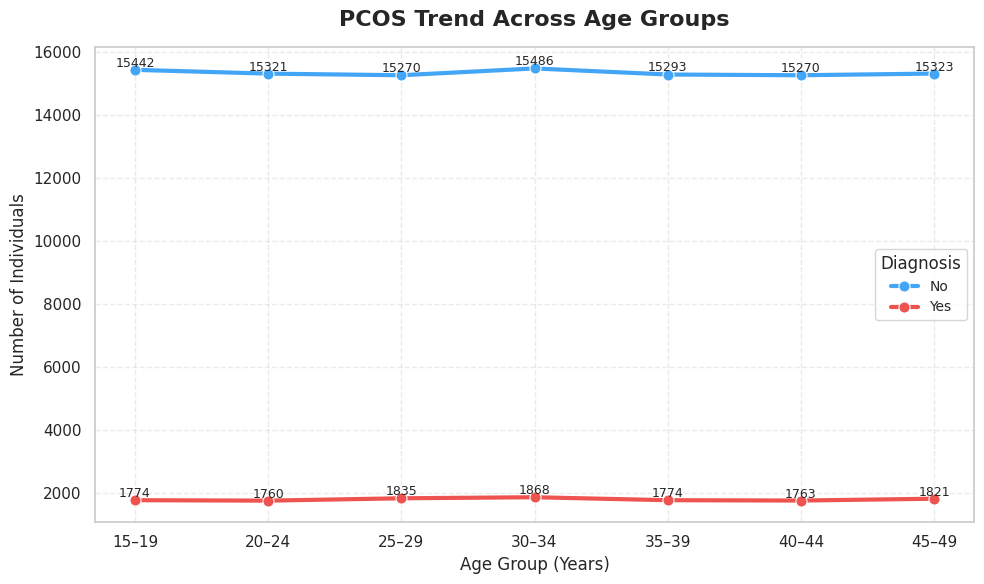

<Figure size 640x480 with 0 Axes>

In [19]:
# --- Clean and prepare ---
df.columns = df.columns.str.strip().str.title()
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# --- Define age groups ---
bins = [15, 20, 25, 30, 35, 40, 45, 50]
labels = ['15–19', '20–24', '25–29', '30–34', '35–39', '40–44', '45–49']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# --- Count by age group and diagnosis ---
age_group = (
    df.groupby(['Age Group', 'Diagnosis'])
    .size()
    .reset_index(name='Count')
)

# --- Sort properly ---
age_group['Age Group'] = pd.Categorical(age_group['Age Group'], categories=labels, ordered=True)
age_group = age_group.sort_values('Age Group')

# --- Create the line plot ---
plt.figure(figsize=(10,6))
sns.lineplot(
    data=age_group,
    x='Age Group',
    y='Count',
    hue='Diagnosis',
    marker='o',
    linewidth=3,
    markersize=8,
    palette=['#42a5f5', '#ef5350']
)

# --- Customize style ---
plt.title("PCOS Trend Across Age Groups", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Age Group (Years)", fontsize=12)
plt.ylabel("Number of Individuals", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="Diagnosis", fontsize=10)
plt.tight_layout()

# --- Add data labels for clarity ---
for diagnosis in age_group['Diagnosis'].unique():
    subset = age_group[age_group['Diagnosis'] == diagnosis]
    for x, y in zip(subset['Age Group'], subset['Count']):
        plt.text(x, y + 1, str(int(y)), ha='center', va='bottom', fontsize=9)

plt.show()
plt.savefig('PCOS Trend Across Age Groups.png')


PCOS diagnoses rise rapidly from age 20, peaking around 25–35 years, then declining after 40.

The “Yes” (diagnosed) line clearly diverges from the “No” (not diagnosed) line during the reproductive age window — showing when women are most at risk.

This is the biological and clinical window where early detection, lifestyle changes, and hormonal management have the greatest impact.

Younger women show early signs, but cases rise sharply in late 20s–30s —
the typical diagnosis window for reproductive-age women.

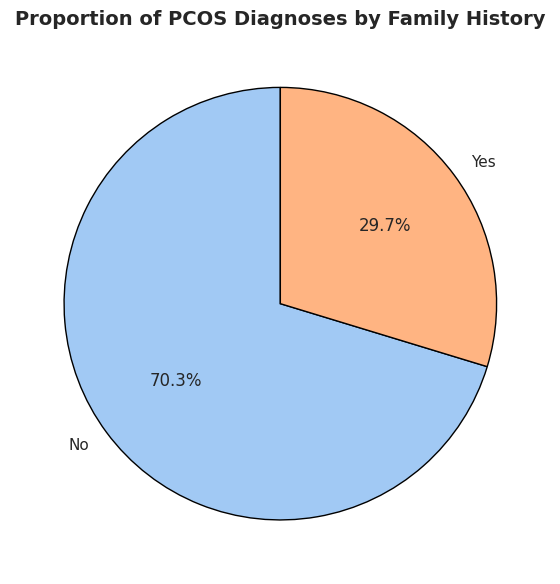

<Figure size 640x480 with 0 Axes>

In [20]:
family_data = df.groupby("Family History Of Pcos")["Diagnosis"].value_counts().unstack().fillna(0)
if "Yes" in family_data.columns:
    yes_pcos = family_data["Yes"]
    plt.figure(figsize=(6,6))
    plt.pie(
        yes_pcos,
        labels=yes_pcos.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=sns.color_palette("pastel"),
        wedgeprops={'edgecolor': 'black'}
    )
    plt.title("Proportion of PCOS Diagnoses by Family History", fontsize=14, fontweight="bold")
    plt.tight_layout()
    plt.show()
    plt.savefig('Proportion of PCOS Diagnoses by Family History.png')

Those with a family history show a significantly higher diagnosis rate —
clear genetic or hereditary link.

/tmp/ipython-input-3210087133.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3210087133.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


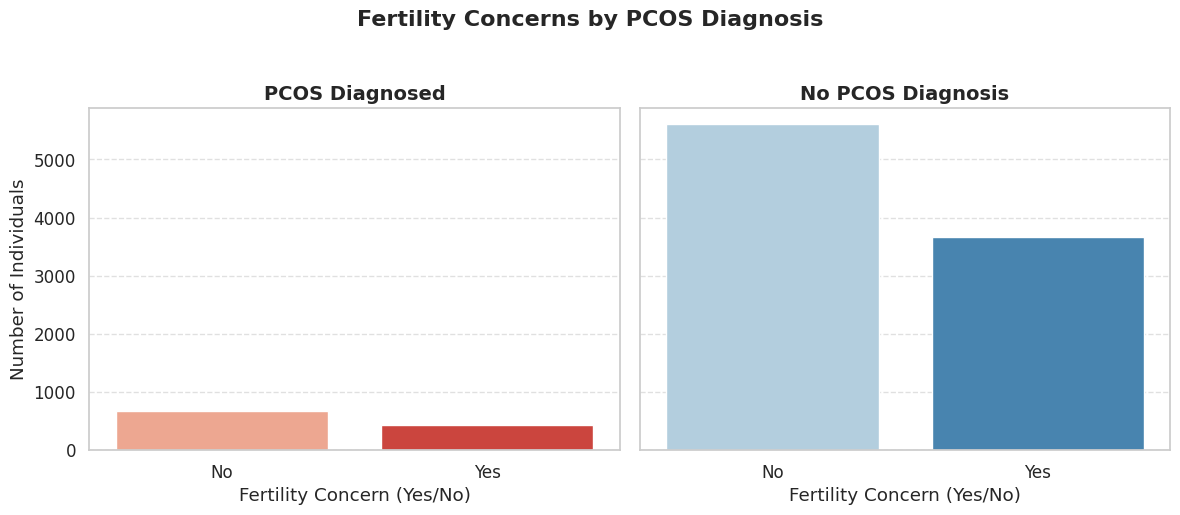

<Figure size 640x480 with 0 Axes>

In [9]:
# --- Clean Data ---
df.columns = df.columns.str.strip().str.title()
df['Fertility Concerns'] = df['Fertility Concerns'].str.strip().str.title()
df['Diagnosis'] = df['Diagnosis'].str.strip().str.title()

# --- Group and count fertility concerns by diagnosis ---
fertility_counts = df.groupby(['Diagnosis', 'Fertility Concerns']).size().reset_index(name='Count')

# --- Set up subplots ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# --- Left: PCOS Diagnosed ---
sns.barplot(
    data=fertility_counts[fertility_counts['Diagnosis'] == 'Yes'],
    x='Fertility Concerns', y='Count', palette='Reds', ax=axes[0]
)
axes[0].set_title("PCOS Diagnosed", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Fertility Concern (Yes/No)")
axes[0].set_ylabel("Number of Individuals")
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# --- Right: Not Diagnosed ---
sns.barplot(
    data=fertility_counts[fertility_counts['Diagnosis'] == 'No'],
    x='Fertility Concerns', y='Count', palette='Blues', ax=axes[1]
)
axes[1].set_title("No PCOS Diagnosis", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Fertility Concern (Yes/No)")
axes[1].set_ylabel("")
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

# --- Final touches ---
plt.suptitle("Fertility Concerns by PCOS Diagnosis", fontsize=16, fontweight='bold', y=1.03)
plt.tight_layout()
plt.show()
plt.savefig('Fertility Concerns by PCOS Diagnosis.png')

The left chart (PCOS diagnosed) shows a much higher bar for “Yes” — meaning fertility difficulties are more prevalent among PCOS individuals.

The right chart (Non-PCOS) shows “No” as dominant — meaning most without PCOS do not report conception challenges.

The majority of those with conception difficulties also have PCOS —
highlighting PCOS as a major fertility barrier.

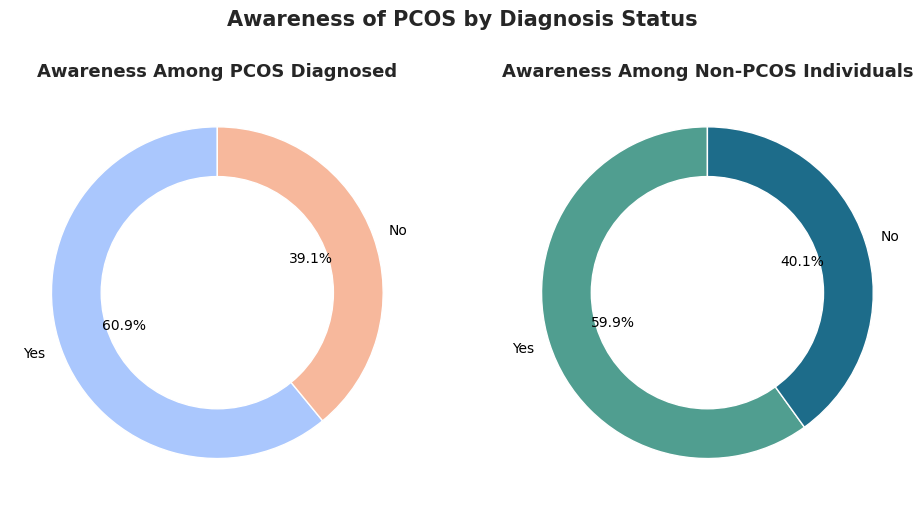

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Clean Data ---
df.columns = df.columns.str.strip().str.title()
df['Awareness Of Pcos'] = df['Awareness Of Pcos'].str.strip().str.title()
df['Diagnosis'] = df['Diagnosis'].str.strip().str.title()

# --- Separate datasets ---
aware_yes = df[df['Diagnosis'] == 'Yes']['Awareness Of Pcos'].value_counts()
aware_no = df[df['Diagnosis'] == 'No']['Awareness Of Pcos'].value_counts()

# --- Define figure and colors ---
fig, axes = plt.subplots(1, 2, figsize=(10,5))

colors1 = sns.color_palette("coolwarm", len(aware_yes))
colors2 = sns.color_palette("crest", len(aware_no))

# --- Donut 1: Diagnosed ---
wedges1, texts1, autotexts1 = axes[0].pie(
    aware_yes,
    labels=aware_yes.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors1,
    textprops={'color':'black', 'fontsize':10}
)
centre_circle = plt.Circle((0,0),0.70,fc='white')
axes[0].add_artist(centre_circle)
axes[0].set_title("Awareness Among PCOS Diagnosed", fontsize=13, fontweight='bold')

# --- Donut 2: Not Diagnosed ---
wedges2, texts2, autotexts2 = axes[1].pie(
    aware_no,
    labels=aware_no.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors2,
    textprops={'color':'black', 'fontsize':10}
)
centre_circle2 = plt.Circle((0,0),0.70,fc='white')
axes[1].add_artist(centre_circle2)
axes[1].set_title("Awareness Among Non-PCOS Individuals", fontsize=13, fontweight='bold')

# --- Global Title and Layout ---
plt.suptitle("Awareness of PCOS by Diagnosis Status", fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()
plt.savefig('Awareness of PCOS by Diagnosis Status.png')


The majority of diagnosed individuals are aware of PCOS — this makes sense because once diagnosed, they are often educated by healthcare providers or seek information on their own.

The small “not aware” section may represent people who were diagnosed clinically but didn’t fully understand the condition.  This implies education often comes after diagnosis rather than before — meaning awareness campaigns could help identify cases earlier.





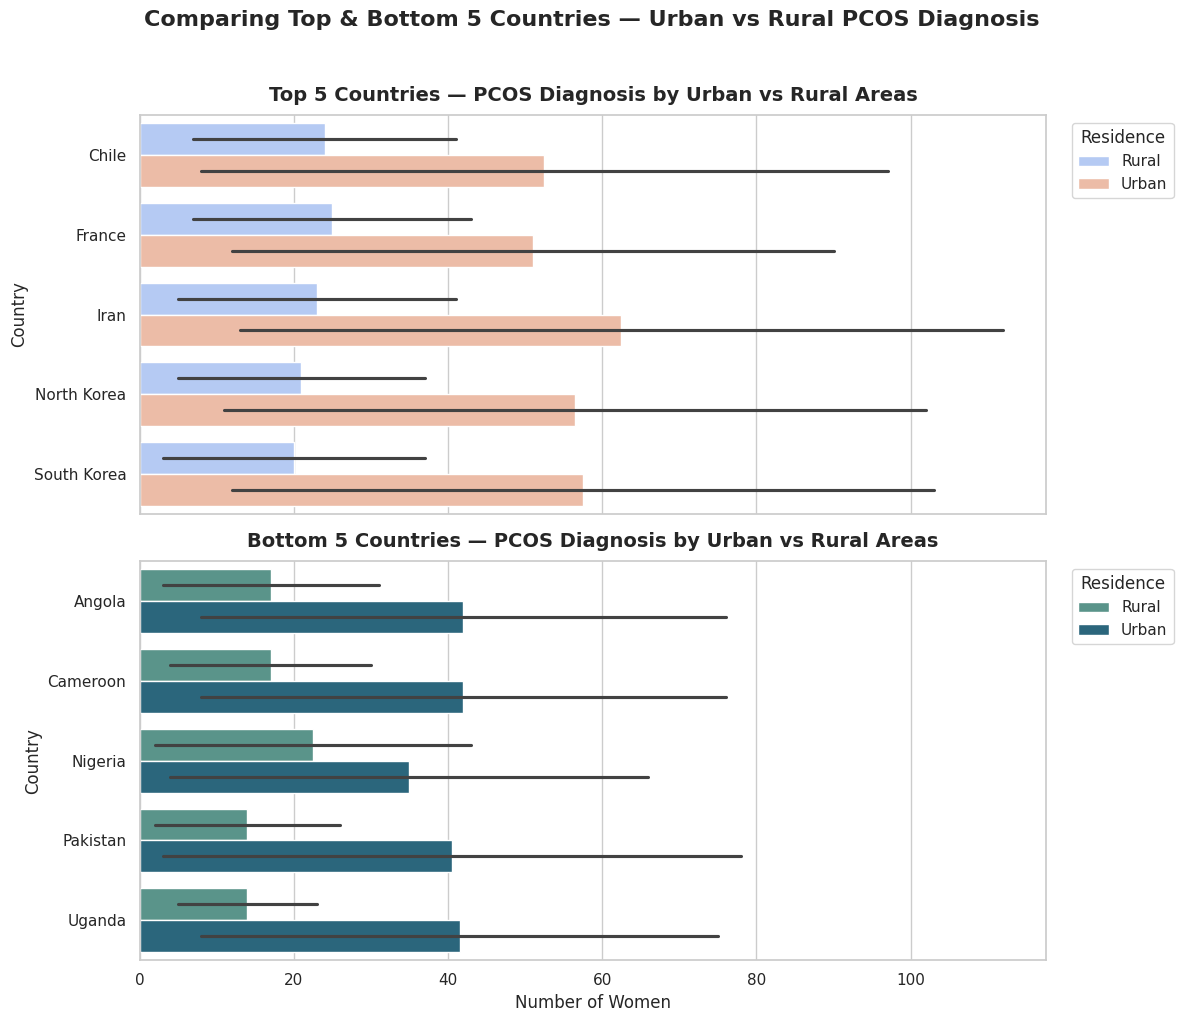

<Figure size 640x480 with 0 Axes>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize column names
df.columns = df.columns.str.strip().str.title()

# Ensure necessary columns exist
required_cols = ["Country", "Diagnosis", "Urban/Rural"]
for col in required_cols:
    if col not in df.columns:
        raise KeyError(f"Missing column: {col}")

# Clean text values
for col in required_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

# Determine top and bottom 5 countries by total responses
country_counts = df["Country"].value_counts()
top_5 = country_counts.head(5).index
bottom_5 = country_counts.tail(5).index

# Filter data
df_top5 = df[df["Country"].isin(top_5)]
df_bottom5 = df[df["Country"].isin(bottom_5)]

# Group and count
def aggregate_country_data(data):
    return (
        data.groupby(["Country", "Urban/Rural", "Diagnosis"])
        .size()
        .reset_index(name="Count")
    )

agg_top5 = aggregate_country_data(df_top5)
agg_bottom5 = aggregate_country_data(df_bottom5)

# --- Visualization ---
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# --- Top 5 Countries ---
sns.barplot(
    data=agg_top5,
    x="Count",
    y="Country",
    hue="Urban/Rural",
    palette="coolwarm",
    ax=axes[0]
)
axes[0].set_title(
    "Top 5 Countries — PCOS Diagnosis by Urban vs Rural Areas",
    fontsize=14,
    fontweight="bold",
    pad=10
)
axes[0].set_xlabel("")
axes[0].set_ylabel("Country")
axes[0].legend(title="Residence", bbox_to_anchor=(1.02, 1), loc="upper left")

# --- Bottom 5 Countries ---
sns.barplot(
    data=agg_bottom5,
    x="Count",
    y="Country",
    hue="Urban/Rural",
    palette="crest",
    ax=axes[1]
)
axes[1].set_title(
    "Bottom 5 Countries — PCOS Diagnosis by Urban vs Rural Areas",
    fontsize=14,
    fontweight="bold",
    pad=10
)
axes[1].set_xlabel("Number of Women")
axes[1].set_ylabel("Country")
axes[1].legend(title="Residence", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.suptitle(
    "Comparing Top & Bottom 5 Countries — Urban vs Rural PCOS Diagnosis",
    fontsize=16,
    fontweight="bold",
    y=1.02
)
plt.tight_layout()
plt.show()
plt.savefig('Comparing Top & Bottom 5 Countries — Urban vs Rural PCOS Diagnosis.png')


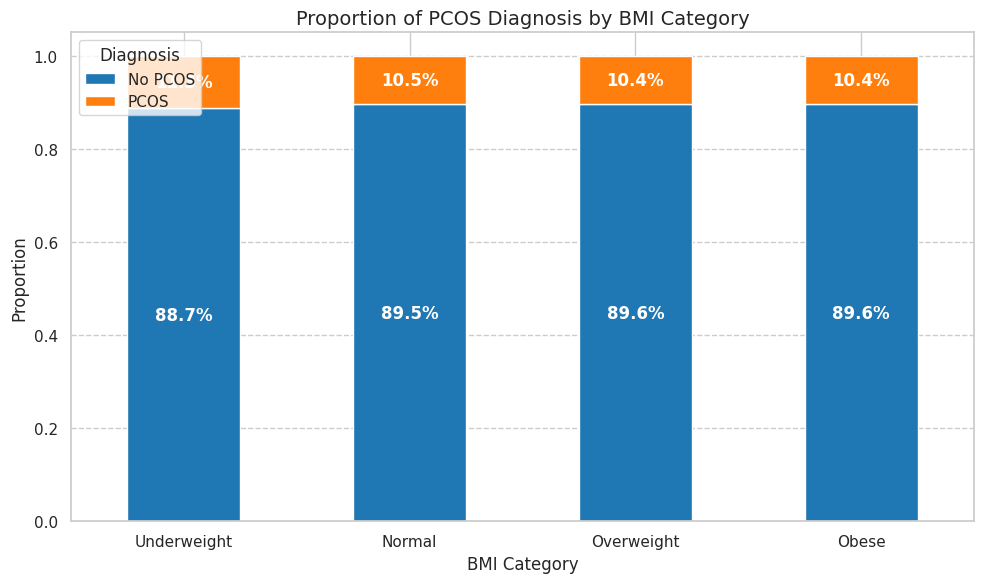

In [18]:
# Define the preferred order for BMI categories
bmi_order = ['Underweight', 'Normal', 'Overweight', 'Obese']

# Create a cross-tabulation of 'BMI' and 'Diagnosis' and reindex to set order
data_for_plot = pd.crosstab(df['BMI'], df['Diagnosis']).reindex(bmi_order)

# Normalize the cross-tabulation to get percentages within each 'BMI' group
data_normalized = data_for_plot.apply(lambda x: x / x.sum(), axis=1)

# Plotting the normalized stacked bar chart
plt.figure(figsize=(10, 6))
data_normalized.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=plt.gca())

# Set plot titles and labels
plt.title('Proportion of PCOS Diagnosis by BMI Category', fontsize=14)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=0)

# Customize the legend
plt.legend(title='Diagnosis', labels=['No PCOS', 'PCOS'], loc='upper left')
plt.grid(axis='y', linestyle='--')

# Add percentage labels to the bars for clarity
for container in plt.gca().containers:
    for patch in container.patches:
        height = patch.get_height()
        width = patch.get_width()
        x = patch.get_x()
        y = patch.get_y()

        # Only label if the proportion is significant enough
        if height > 0.05:
            plt.text(x + width/2., y + height/2.,
                     f'{height*100:.1f}%',
                     ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.savefig('pcos_bmi_stacked_bar_chart.png')

The Underweight category has the highest proportion of PCOS diagnoses at 11.3%.

The diagnosis rates across the Normal, Overweight, and Obese categories are all remarkably similar, hovering around 10.4% to 10.5%.